# Week 3 Assignment
> Due Sept 29

## Task

Using Linear-regression.train.csv provided, write a gradient descent algorithm to find the curve/line (having parameters θ1 and θ0 )that best fits the point based on the idea of linear regression.

### Algorithm (Setup)

1. Initialize both the parameters as 1.
2. Set step size/learning rate to 0.01.
3. You can stop if you have exhausted 100 iterations.
4. You can also stop before if the change in the objective from a previous iteration is less than a tolerance (set to .001)

### Deliverables (submit to week3assignment as a doc/docx file)

1. Output the least squares error and parameters of the function learnt.
2. Plot the least squares error in each iteration.
3. In a separate figure, Plot the line found via the optimization (in red) and the original points (in blue).

In [17]:
import math, copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

In [3]:
# load our dataset
linear_reg_train_csv_file = "../data-raw/linear-regression.train.csv"

In [6]:
with open(linear_reg_train_csv_file, "r") as input_csv:
    df = pd.read_csv(input_csv,header=None)

In [7]:
df.head()

,0,1
0,1.773926,-1.124183
1,5.846599,-1.211766
2,4.324710,-0.362800
3,2.306738,-2.085373
4,4.980138,-1.356403


In [11]:
x_train = df[0].to_numpy() # features
y_train = df[1].to_numpy() # target values

## Compute the Cost

In [19]:
# Function to compute the cost
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0

    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    
    total_cost = 1 / (2 * m) * cost

    return total_cost

## Gradient Descent Summary

We have a linear model that predicts $f_{w,b}(x^{i})$:
$$
f_{w,b}(x^{i}) = wx^{i}+b \tag{1}
$$

In linear regression, you utilize input training data to fit the parameters $w,b$ by minimizing a measure of the error between our predictions $f_{w,b}(x^{i})$ and the actual data $y^{i}$. The measure is called $cost, J(w,b)$. In training, you measure the cost over all of our training samples $(x^{i}, y^{i})$

$$
J(w,b) = \frac{1}{2m}\sum\limits_{i=0}^{m-1}(f_{w,b}(x^{i})-y^{i})^{2} \tag{2}
$$

In lecture, *gradient descent* was described as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, parameters $w,b$ are updated simultaneously.

The gradient is defined as:

$$
\begin{align*}
\frac{\partial J(w,b)}{\partial w} = \frac{1}{m}\sum\limits_{i=0}^{m-1}(f_{w,b}(x^{i})-y^{i})x^{i} \tag{4} \newline
\frac{\partial J(w,b)}{\partial b} = \frac{1}{m}\sum\limits_{i=0}^{m-1}(f_{w,b}(x^{i})-y^{i}) \tag{5}
\end{align*}$$

Here, *simultaneously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.

### Implement Gradient Descent

We will implement the gradient descent algorithm for one feature. We will need three functions:

- `compute_gradient` implementing equations (4) and (5).
- `compute_cost` implementing equation (2), which is already implemented.
- `gradient_descent`, utilizing `compute_gradient` and `compute_cost`.

Conventions:

- The naming of python variables containing partial derivatives follow this pattern, $\frac{\partial J(w,b)}{\partial b}$ will be `dj_db`.
- w.r.t. is With Respect To, as in partial derivative of $J(w,b)$ With Respect To $b$.

### `compute_gradient`

`compute_gradient` implements (4) and (5) above and returns $\frac{\partial J(w,b)}{\partial w}$, $\frac{\partial J(w,b)}{\partial b}$.

In [15]:
def compute_gradient(x, y, w, b):
    """
    Computes the gradient for linear regression
    Args:
        x (ndarray (m,)): Data, m examples
        y (ndarray (m,)): target values
        w,b (scalar)    : model parameters
    Returns
        dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
        dj_db (scalar): The gradient of the cost w.r.t. the parameter b
    """

    # Number of training examples
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b
        
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = (f_wb - y[i])

        dj_db += dj_db_i
        dj_dw += dj_dw_i

    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

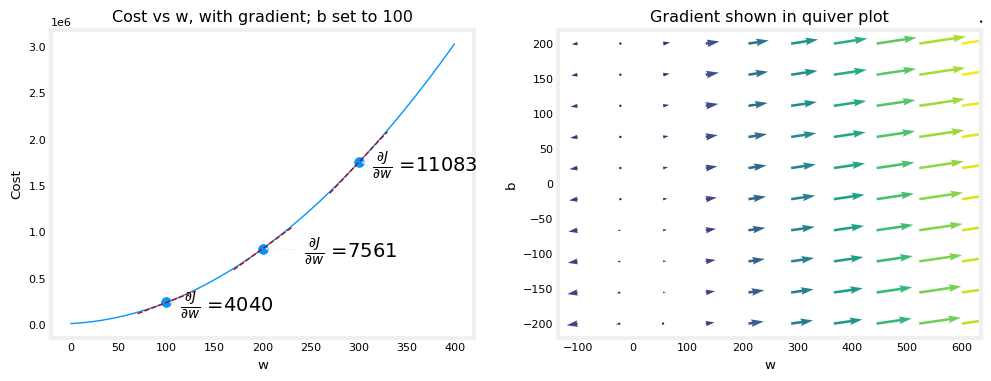

In [20]:
plt_gradients(x_train, y_train, compute_cost, compute_gradient)
plt.show()

In [21]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    w = copy.deepcopy(w_in) # avoid modifying global w_in
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

In [69]:
# initialize parameters
w_init = 1
b_init = 1
# some gradient descent settings
iterations = 100000
tmp_alpha = 0.001
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 2.09e+01  dj_dw:  3.898e+01, dj_db:  6.066e+00   w:  9.610e-01, b: 9.93934e-01
Iteration 10000: Cost 6.79e-01  dj_dw: -4.093e-03, dj_db:  2.755e-02   w:  7.284e-02, b:-2.18589e-01
Iteration 20000: Cost 6.77e-01  dj_dw: -4.205e-04, dj_db:  2.830e-03   w:  8.898e-02, b:-3.27192e-01
Iteration 30000: Cost 6.77e-01  dj_dw: -4.319e-05, dj_db:  2.907e-04   w:  9.064e-02, b:-3.38349e-01
Iteration 40000: Cost 6.77e-01  dj_dw: -4.437e-06, dj_db:  2.986e-05   w:  9.081e-02, b:-3.39495e-01
Iteration 50000: Cost 6.77e-01  dj_dw: -4.558e-07, dj_db:  3.068e-06   w:  9.082e-02, b:-3.39612e-01
Iteration 60000: Cost 6.77e-01  dj_dw: -4.682e-08, dj_db:  3.151e-07   w:  9.082e-02, b:-3.39624e-01
Iteration 70000: Cost 6.77e-01  dj_dw: -4.810e-09, dj_db:  3.237e-08   w:  9.082e-02, b:-3.39626e-01
Iteration 80000: Cost 6.77e-01  dj_dw: -4.941e-10, dj_db:  3.325e-09   w:  9.082e-02, b:-3.39626e-01
Iteration 90000: Cost 6.77e-01  dj_dw: -5.075e-11, dj_db:  3.416e-10   w:  9.082e-02, b:-3.3

### Cost versus iterations of gradient descent

A plot of cost versus iterations is a useful measure of progress in gradient descent. Cost should always decrease in successful runs. The change in cost is so rapid initially, it is useful to plot the initial decent on a different scale than the final descent. In the plots below, note the scale of cost on the axes and the iteration step.

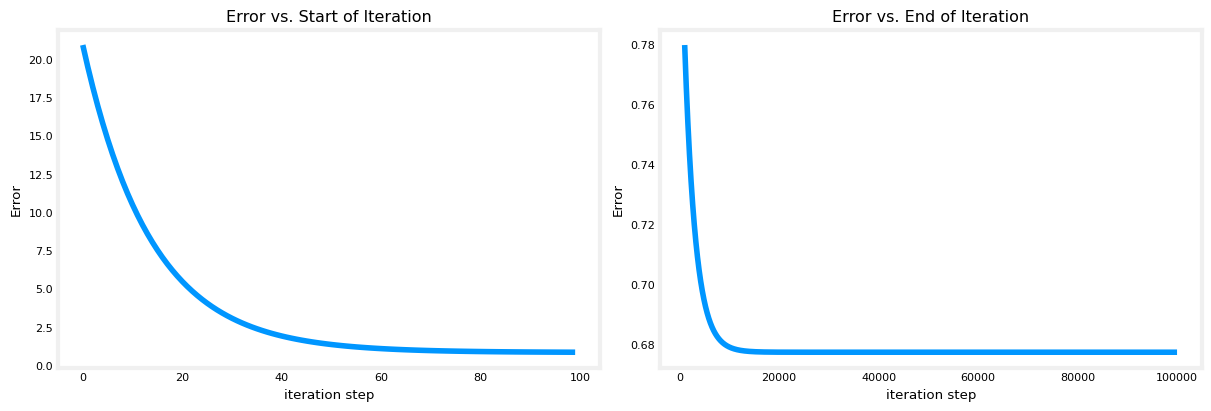

In [70]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Error vs. Start of Iteration");  ax2.set_title("Error vs. End of Iteration")
ax1.set_ylabel('Error')                      ;  ax2.set_ylabel('Error') 
ax1.set_xlabel('iteration step')             ;  ax2.set_xlabel('iteration step') 

plt.savefig("./imgs/error_vs_iteration.png")

plt.show()

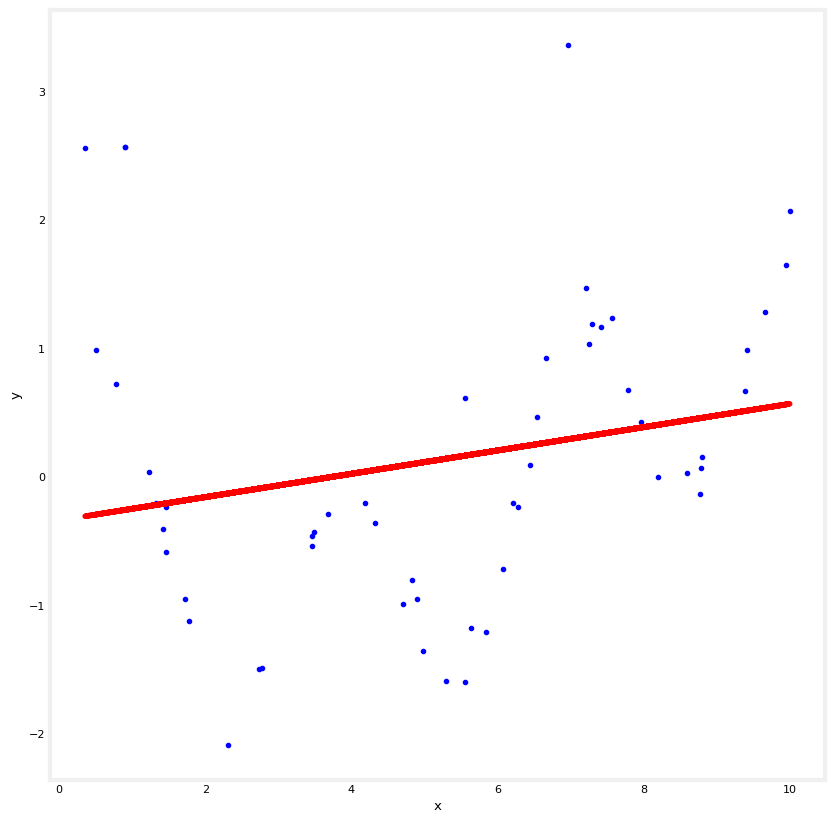

In [71]:
# plot the results
plt.figure(figsize = (10, 10))
plt.plot(x_train, y_train, "b.")
plt.plot(x_train, w_final*x_train + b_final, "red")
plt.xlabel("x")
plt.ylabel("y")

plt.savefig("./imgs/resuts.png")

plt.show()